<p style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/World_Health_Organization_Logo.svg/375px-World_Health_Organization_Logo.svg.png"
         alt="WHO Logo"
         style="display: block; margin: auto; height: 50px;" />
</p>

# 🌍 World Health Organisation Project: Predicting Life Expectancy 📊


<p style="text-align: left;">
    <img src="https://th.bing.com/th/id/OIP.-lAhNnbsu_F7YmCUiStBdAHaDt?w=256&h=180&c=7&r=0&o=5&dpr=1.3&pid=1.7 https://th.bing.com/th/id/OIP.-lAhNnbsu_F7YmCUiStBdAHaDt?w=256&h=180&c=7&r=0&o=5&dpr=1.3&pid=1.7"
         alt="Kung Fu Panda"
         style="display: block; margin: auto; height: 50px;" />
</p>

```
Kung-Fu Pandas! 🐼🐼🐼
Jamie, Kat, Pedro, Moka
```


## Overview 🧐
We are working on two predictive models for life expectancy:
1. **Detailed & Accurate Model** 📈
2. **Ethical Model** 💡


---

<p style="text-align: left;">
    <img src="https://noodle.digitalfutures.com/studentuploads/Screenshot_2025-04-07_111914.png"
         alt="metadata
        "
         style="display: block; margin: auto; height: 50px;" />
</p>


---

In [ ]:
# Importing the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Life Expectancy Data.csv')
df.shape

(2864, 21)

In [ ]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


>The first thing we want to check for is making sure that __all countries have data for all 16 years in our dataset__ (2000 - 2015)

In [ ]:
df.groupby('Country')[['Year']].agg({'Year': 'count'})['Year'].unique()

array([16])

>The only unique value for 'Year' in the grouped by dataset is __16__ --> great news, this means that __all countries in the dataset do in fact have data for all years__ - no missing years for any

>We will now __check for Nulls__

---



In [ ]:
df.isnull().sum()

,0
Country,0
Region,0
Year,0
Infant_deaths,0
Under_five_deaths,0
Adult_mortality,0
Alcohol_consumption,0
Hepatitis_B,0
Measles,0
BMI,0


>This dataset has __no Nulls__:

>We now __check the data types__ in our dataset

In [ ]:
df.dtypes

,0
Country,object
Region,object
Year,int64
Infant_deaths,float64
Under_five_deaths,float64
Adult_mortality,float64
Alcohol_consumption,float64
Hepatitis_B,int64
Measles,int64
BMI,float64


>* Country and Region are the only text-type columns
>* Possible approaches --> mapping/OHE
>* However, we believe we won't be using either one for the complete/robust model;
>* Our approach is that we want to train our model solely on the __numerical data__ rather than what country or region each numerical data point is "assigned to"

>We now also want to check how the life expectancy naturally evolves per year and per region in our dataset

In [ ]:
region_and_country = df.groupby(['Region', 'Year'])[['Life_expectancy']].agg({'Life_expectancy': 'mean'}).reset_index()
region_and_country.head()

,Region,Year,Life_expectancy
0,Africa,2000,54.137255
1,Africa,2001,54.358824
2,Africa,2002,54.594118
3,Africa,2003,54.964706
4,Africa,2004,55.450980


In [ ]:
print(f"Number of regions: {region_and_country['Region'].nunique()}")
print(f"Region names: {region_and_country['Region'].unique()}")

Number of regions: 9
Region names: ['Africa' 'Asia' 'Central America and Caribbean' 'European Union'
 'Middle East' 'North America' 'Oceania' 'Rest of Europe' 'South America']


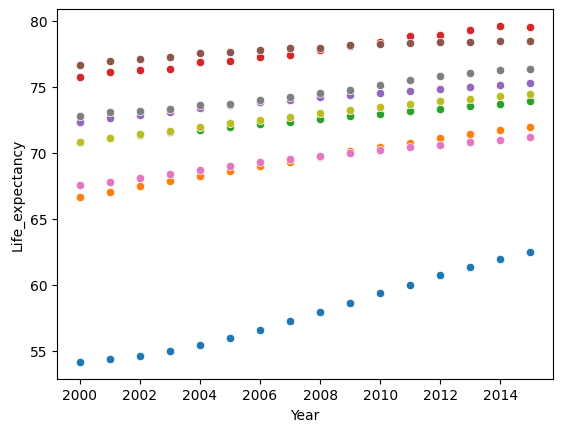

In [ ]:
for i in region_and_country['Region'].unique():
    sns.scatterplot(data = region_and_country[region_and_country['Region'] == i],
                   x='Year',
                   y='Life_expectancy')
plt.show()

>The life expectancy seems to naturally go up over time for every region (some more than others)
>
>* Could use regions as features for the simple model then?
>
>* Would have to either map or OHE them

### **Generating box plots for data exploration**

In [ ]:
# We built a for loop to print outliers for all columns in the dataset (aside from region, country, and year) to check for outliers

# for i in df.drop(['Country','Region', 'Year'],axis=1).columns:
#     plt.figure(figsize = (20, 5))
#     sns.boxplot(data = df[i],
#                 orient = 'h')
#     plt.title(i)
#     plt.show()

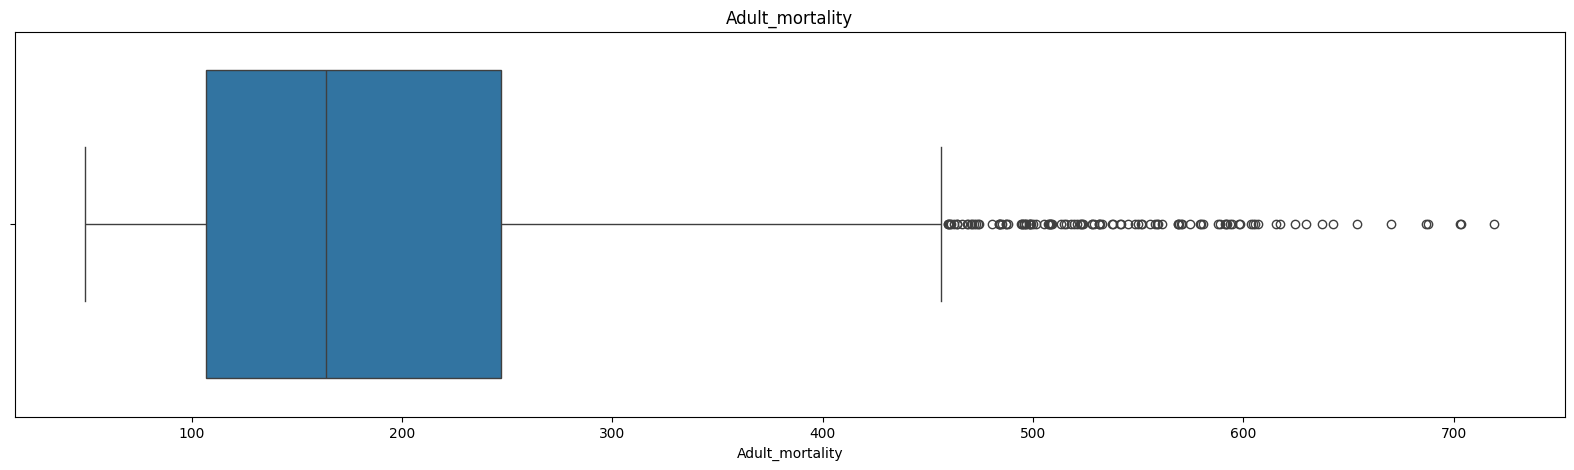

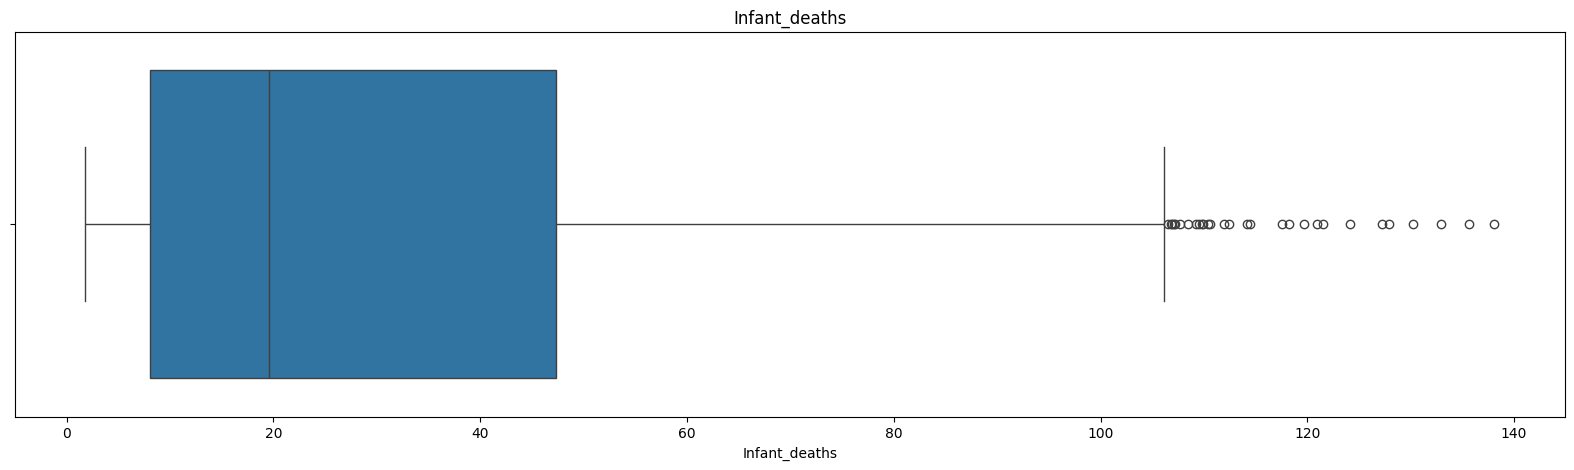

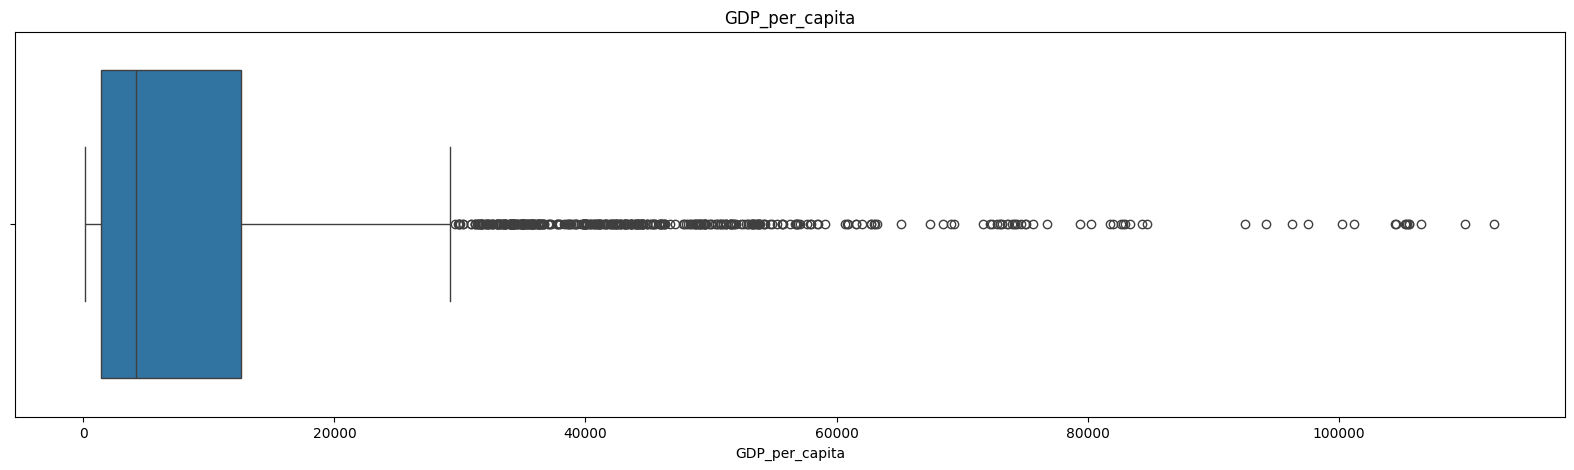

In [ ]:
# Here are the columns we found to be most interesting to explore for outliers --> we also noticed how they operate in entirely different scales!

for i in df[['Adult_mortality','Infant_deaths', 'GDP_per_capita']].columns:
    plt.figure(figsize = (20, 5))
    sns.boxplot(data = df[i],
                orient = 'h')
    plt.title(i)
    plt.show()

>Having looked at the box plots for outliers, we then moved to __checking for the correlation__ across the columns in our dataset

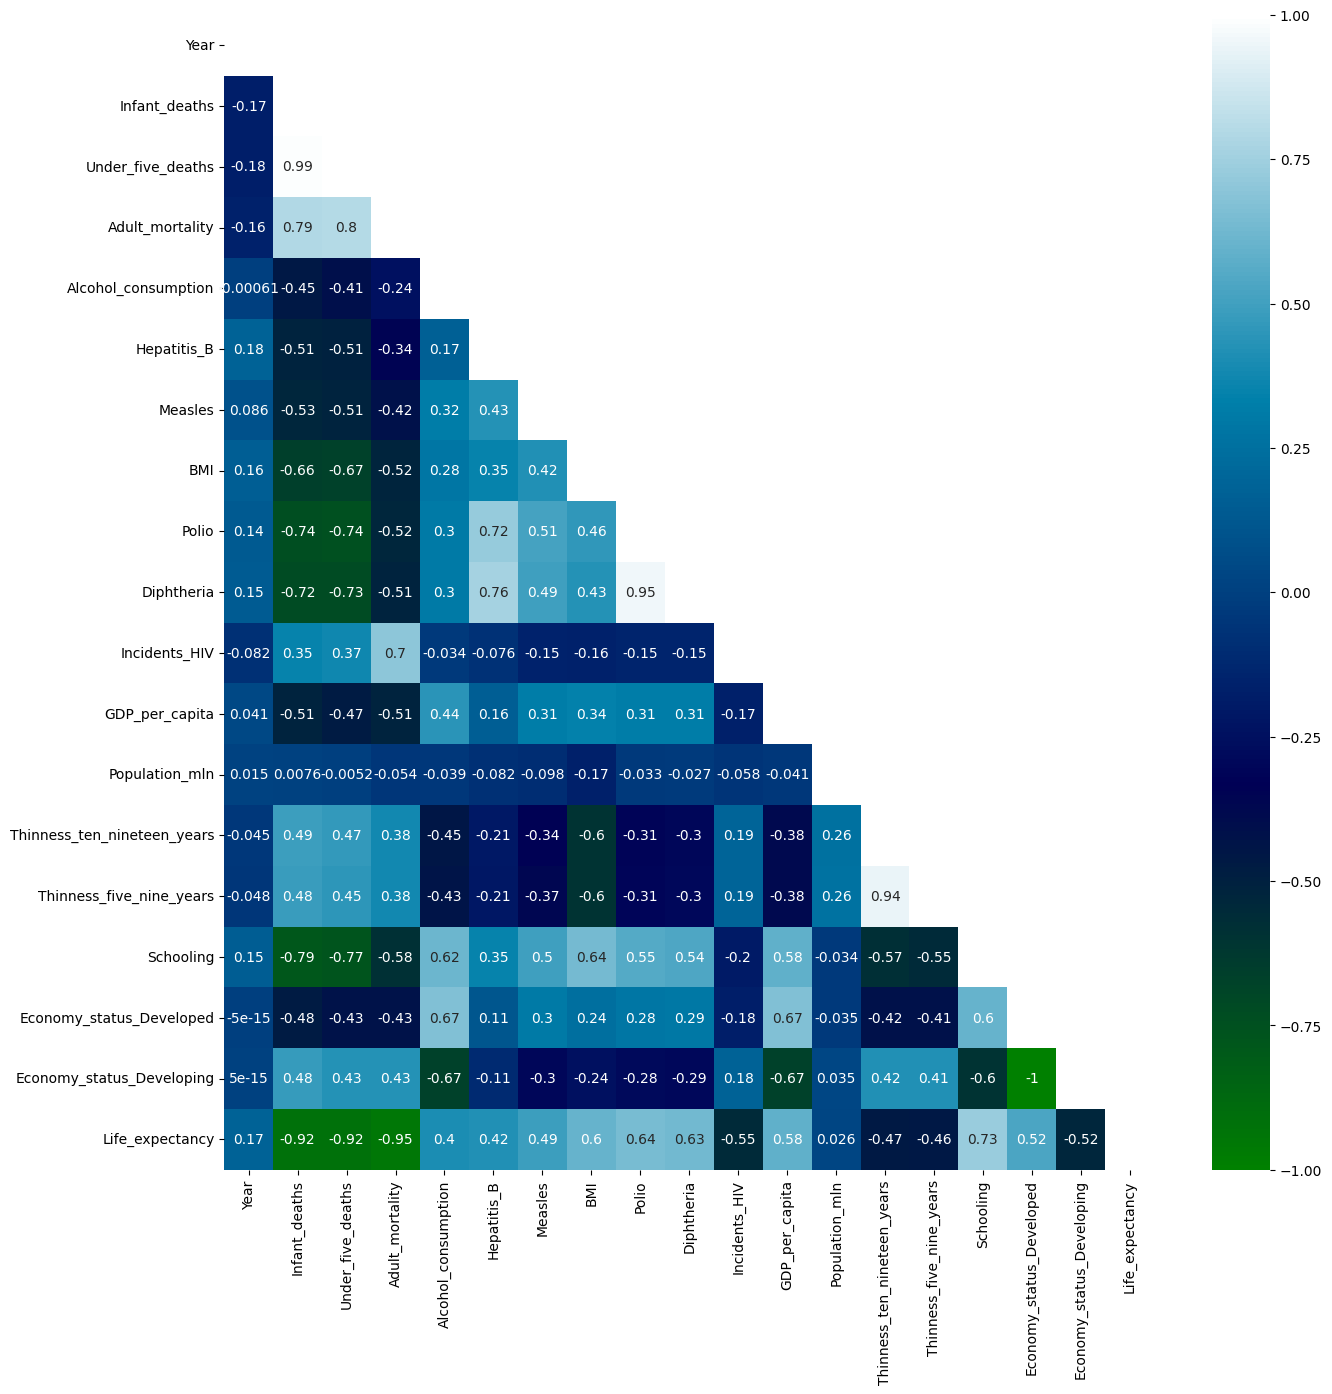

In [ ]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(numeric_only=True),
            annot = True,
            vmin = -1 ,
            vmax = +1 ,
            cmap = 'ocean',
            fmt = '.2g' ,
            mask = np.triu(df.corr(numeric_only=True)))

plt.show()

>Having looked at the correlation via the heatmap, we then decided to __generate a pairplot__ to further examine the correlation between adult mortality and the life expectancy

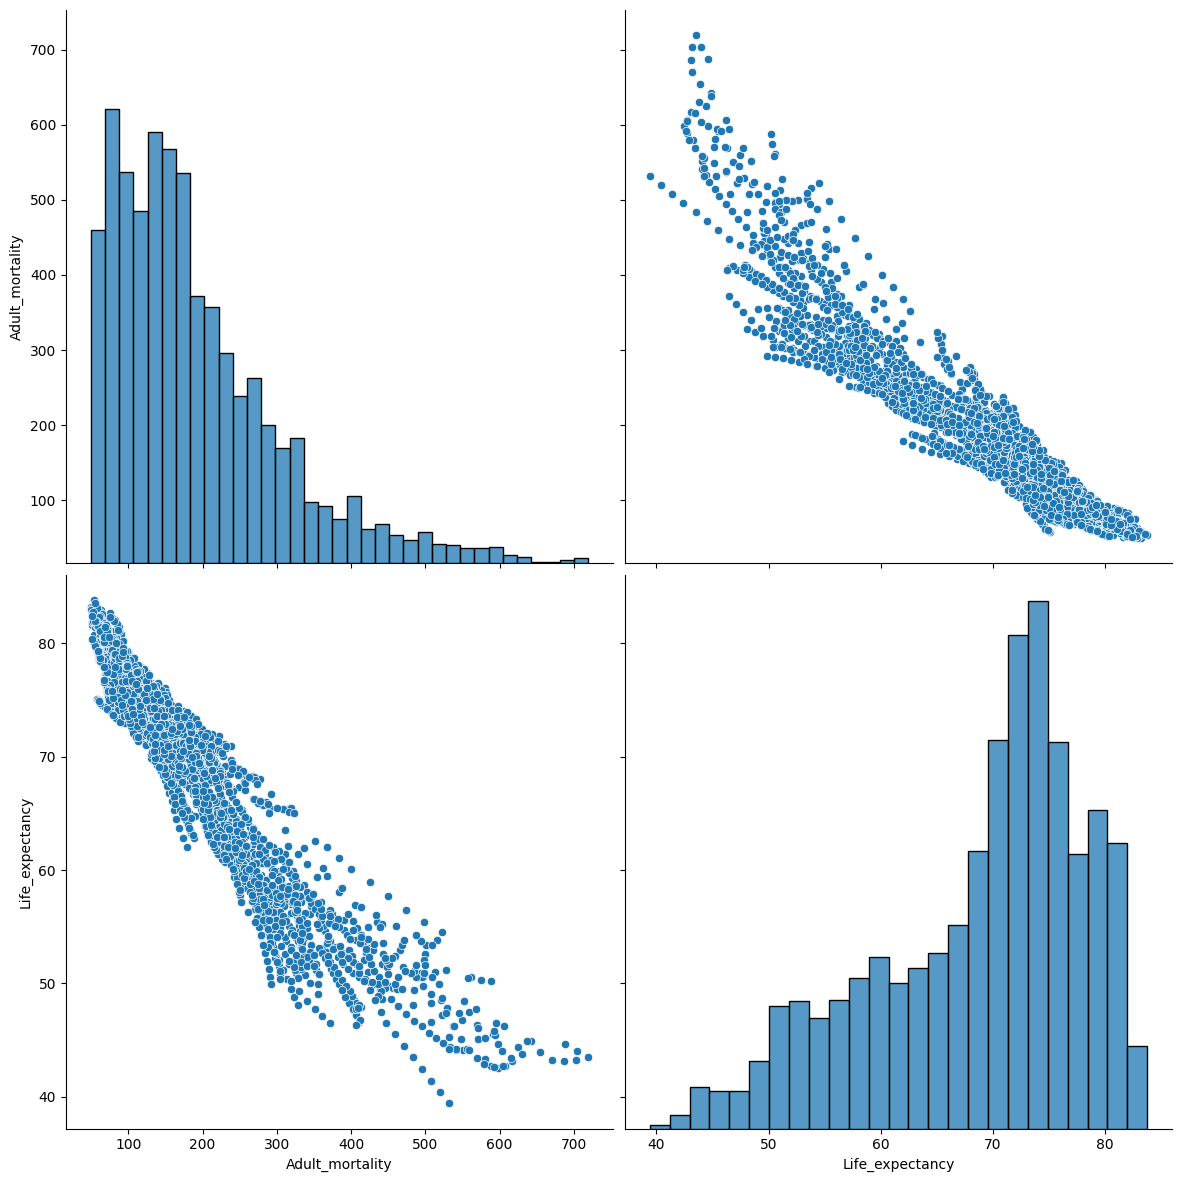

In [ ]:
sns.pairplot(df[['Adult_mortality','Life_expectancy']], height = 6)
plt.show()

# linear correlation